### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Import data

In [3]:
dataset = pd.read_excel('data_ROC.xlsx')
dataset.head()

,UHID,E.coli,K. Pneumoniae,P.aurogenosa,A.baumnnii,P.mirabilis,S. aureus,E.faecalis,S. saprophyticus,minimum,Escherichia coli,Klebsiella pneumoniae,Pseudomonas aeruginosa,Acinetobacter baumannii,Proteus mirabilis,Enterococcus faecalis,Staphylococcus aureus,Staphylococcus saprophyticus,Positive_R,Positive_A
0,20220065432,NaN,NaN,-5.26086,-4.09794,-3.58480,-5.62819,-8.10731,NaN,-8.10731,0,0,0,0,0,1,0,0,1,1
1,20230125389,-15.30980,-10.01740,-9.09993,-8.30414,-5.06676,-8.77797,-5.42121,NaN,-15.30980,1,0,0,0,0,0,0,0,1,1
2,20180022685,-7.70704,-8.08910,-4.79176,-8.63416,-11.84570,-9.90339,-9.31657,NaN,-11.84570,0,0,0,0,0,0,0,0,1,0
3,20240012395,-10.25510,-7.26028,-6.89303,-14.34320,-11.54470,-10.82420,-10.78790,NaN,-14.34320,1,0,0,0,0,0,0,0,1,1
4,20220166372,-9.04000,-5.39780,-12.27840,-8.01114,-11.00330,-11.66680,-13.59960,NaN,-13.59960,1,0,1,0,0,0,0,0,1,1


In [2]:
# dataset = pd.read_excel('Ecoli.xlsx')
# dataset = dataset.dropna()
# dataset.head()
['E.coli','K. Pneumoniae', 'P.aurogenosa','A.baumnnii',	'P.mirabilis',	'S. aureus',	'E.faecalis',	'S. saprophyticus']	

,score,RAMJA,AIIMS
1,-15.30980,1,1
2,-7.70704,0,0
3,-10.25510,1,1
4,-8.87334,1,1
5,-11.28200,1,1


AUC: 0.58


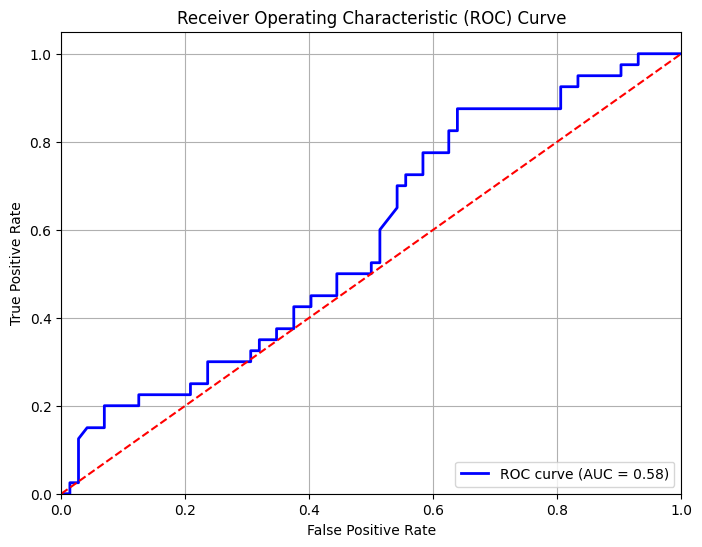

In [31]:
# Assuming you have a DataFrame 'dataset' with 'true_values' and 'device_scores'
# Replace 'true_values' and 'device_scores' with the actual column names
true_values = dataset['Positive_A']  # Actual binary values (0 or 1)
device_scores = abs(dataset['minimum'])  # Scores from the device, ranging from -16 to 0

# Define a cutoff for converting device scores to binary predictions (adjust based on your needs)
cutoff = 8  # Example cutoff; adjust this value based on your data distribution
predicted_labels = (device_scores >= cutoff).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_values, device_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Print the AUC value
print(f"AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


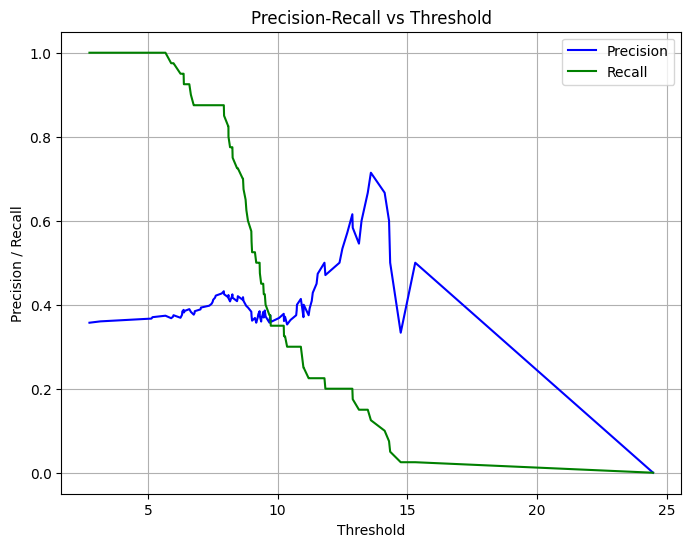

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Replace 'Escherichia coli' and 'E.coli' with your actual column names
true_values = dataset['Positive_A']  # Actual binary values (0 or 1)
device_scores = abs(dataset['minimum'])  # Scores from the device, ranging from -16 to 0

precision, recall, thresholds = precision_recall_curve(true_values, device_scores)

plt.figure(figsize=(8, 6))

# Plot precision and recall as a function of the threshold
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')

# Add labels and legend
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()


AUC: 0.69


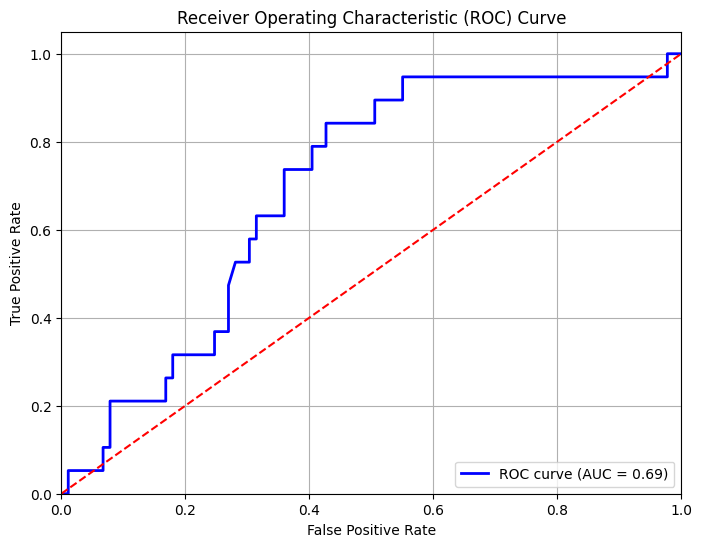

In [35]:
# Assuming you have a DataFrame 'dataset' with 'true_values' and 'device_scores'
# Drop rows where true_values or device_scores contain NaN
dataset_cleaned = dataset[['Escherichia coli', 'E.coli']].dropna()
true_values = dataset_cleaned['Escherichia coli']
device_scores = abs(dataset_cleaned['E.coli'])

# Replace 'true_values' and 'device_scores' with the actual column names
# true_values = dataset['Escherichia coli']  # Actual binary values (0 or 1)
# device_scores = abs(dataset['E.coli'])  # Scores from the device, ranging from -16 to 0

# Define a cutoff for converting device scores to binary predictions (adjust based on your needs)
cutoff = 8  # Example cutoff; adjust this value based on your data distribution
predicted_labels = (device_scores >= cutoff).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_values, device_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Print the AUC value
print(f"AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [39]:
dataset_cleaned.head()

,Klebsiella pneumoniae,K. Pneumoniae
1,0,-10.01740
2,0,-8.08910
3,0,-7.26028
4,0,-5.39780
5,0,-8.40553


AUC: 0.78


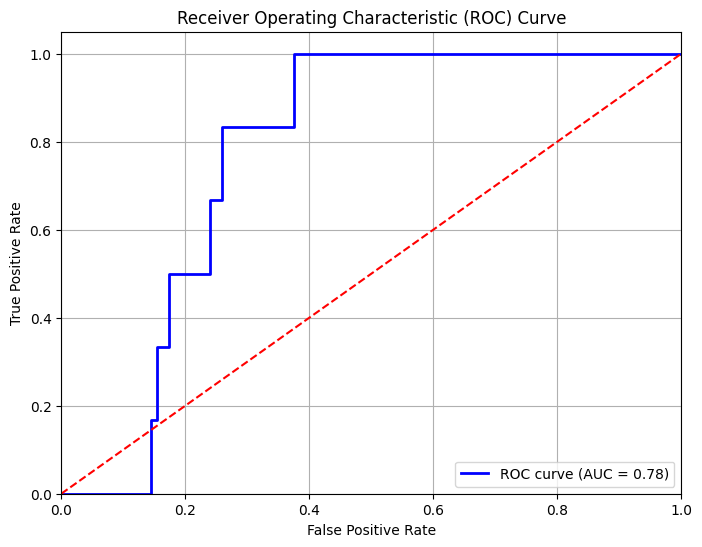

In [40]:
# Assuming you have a DataFrame 'dataset' with 'true_values' and 'device_scores'
# Drop rows where true_values or device_scores contain NaN
dataset_cleaned = dataset[['Klebsiella pneumoniae', 'K. Pneumoniae']].dropna()
true_values = dataset_cleaned.iloc[:,0]
device_scores = abs(dataset_cleaned.iloc[:,1])

# Replace 'true_values' and 'device_scores' with the actual column names
# true_values = dataset['Escherichia coli']  # Actual binary values (0 or 1)
# device_scores = abs(dataset['E.coli'])  # Scores from the device, ranging from -16 to 0

# Define a cutoff for converting device scores to binary predictions (adjust based on your needs)
cutoff = 8  # Example cutoff; adjust this value based on your data distribution
predicted_labels = (device_scores >= cutoff).astype(int)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_values, device_scores)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Print the AUC value
print(f"AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [11]:
pred_R = predicted_labels

In [30]:
# pd.DataFrame({
#     'predicted': predicted_labels,
#     'Positive_R': dataset['Positive_R']
# })

AUC: 0.88


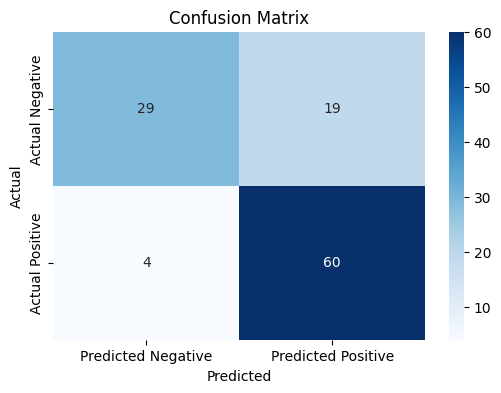

In [33]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'true_values' contains the actual labels (0 or 1)
# And 'predicted_labels' contains the predictions made by comparing device_scores to a cutoff
true_values = dataset['Positive_R']
# Compute the confusion matrix
cm = confusion_matrix(true_values, predicted_labels)

# Calculate the AUC
auc_value = roc_auc_score(true_values, device_scores)

# Print the AUC value
print(f"AUC: {auc_value:.2f}")

# Display the confusion matrix using Seaborn's heatmap for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


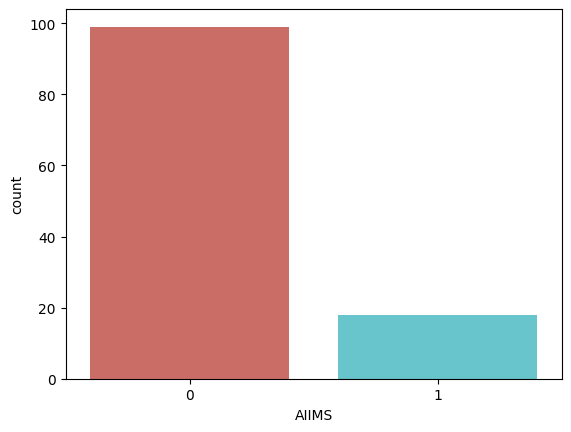

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot for the 'outcome' column in the dataset
sns.countplot(x='RAMJA', data=dataset, palette='hls')
sns.countplot(x='AIIMS', data=dataset, palette='hls')

# Display the plot
plt.show()

<Axes: >

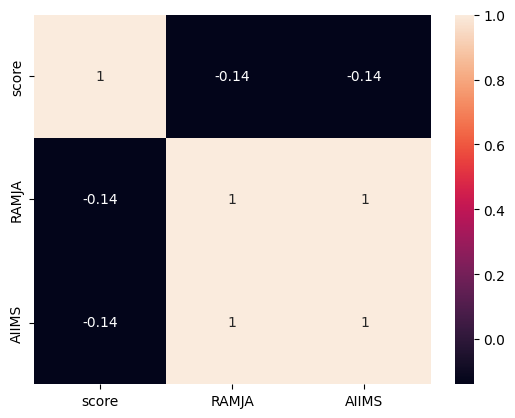

In [88]:
sns.heatmap(dataset.corr(),annot=True)

In [89]:
dataset.groupby('outcome').mean()

KeyError: 'outcome'

<Axes: xlabel='RAMJA', ylabel='score'>

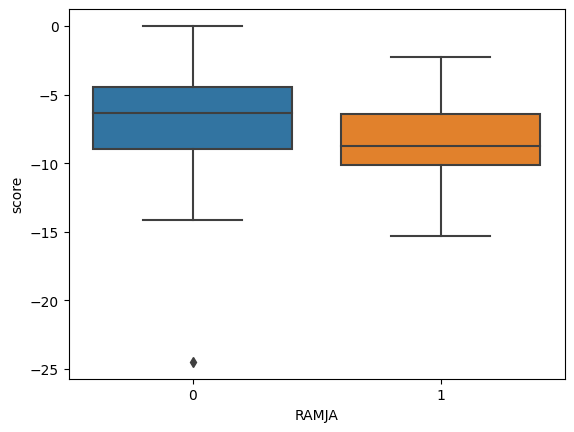

In [90]:
sns.boxplot(x='RAMJA',y='score',data=dataset)

<Axes: xlabel='AIIMS', ylabel='score'>

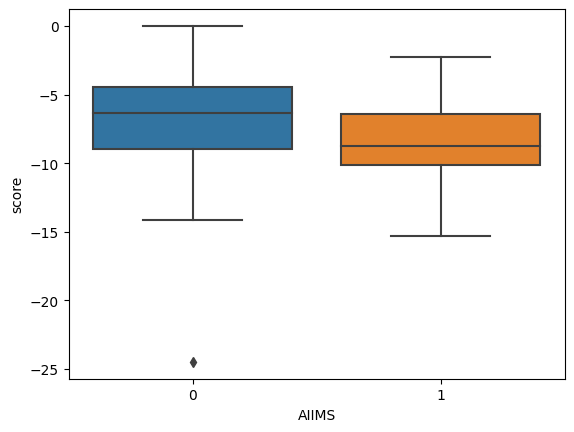

In [91]:
sns.boxplot(x='AIIMS',y='score',data=dataset)

In [81]:
#..............Assigning X and Y variables...........#
x = dataset.drop(['outcome'], axis=1)
y = np.array(dataset['outcome']).reshape(-1,1) 

In [82]:
#.............Split train and test sets..............#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=25, stratify=y)

In [83]:
#...............Feature scaling..................#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
#dataset.isnull().sum()

In [36]:
#sns.boxplot(x='Outcome', y='Glucose', data=dataset, palette='hls')

In [37]:
#sns.heatmap(dataset.corr())

### Run all algorithms

In [84]:
def y_pred(x_train, x_test, y_train, y_test):
    from classmodels import classifiers
    # Create an instance of MyClass
    my_instance = classifiers(x_train, x_test, y_train, y_test)
    scoreind = ['Accuracy', 'Sensitivity', 'Specificity', 'AUC', 'PPV', 'NPV', 'PLR', 'NLR']
    # List of method names you want to call
    methods_to_call = ['logreg', 'dt']
    #methods_to_call = ['lr', 'lasso','rf']

    tempY = []
    tempS = []
    tempYProb = []
    # Use a loop to call the methods
    for method_name in methods_to_call:
        # Use getattr to get the method by name and then call it
        method = getattr(my_instance, method_name)
        y_pred = method(x_train, x_test, y_train, y_test)[0]
        scores = method(x_train, x_test, y_train, y_test)[1]
        y_pred_prob = method(x_train, x_test, y_train, y_test)[2]
        tempY.append(y_pred.reshape(-1, 1))
        tempS.append(scores.reshape(-1, 1))
        tempYProb.append(y_pred_prob.reshape(-1, 1))

    tempY = np.hstack(tempY)  # Stack the column vectors horizontally
    predAll = pd.DataFrame(data=tempY, columns=methods_to_call)
    tempS = np.hstack(tempS)  # Stack the column vectors horizontally
    scoresAll = pd.DataFrame(data=tempS, columns=methods_to_call, index=scoreind)
    tempYProb = np.hstack(tempYProb)
    YProbAll = pd.DataFrame(data=tempYProb, columns=methods_to_call)
    #temp = np.concatenate((y_test,temp),1)
    return(predAll,scoresAll,YProbAll)

In [85]:
PredAll = y_pred(x_train, x_test, y_train, y_test)[0]
ScoreAll = y_pred(x_train, x_test, y_train, y_test)[1]
YProbAll = y_pred(x_train, x_test, y_train, y_test)[2]

c:\Users\neele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\neele\OneDrive\Documents\GitHub\DiagnosticsPy\classmodels.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  spec = cm[1,1]/(cm[1,1]+cm[0,1])
c:\Users\neele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\neele\OneDrive\Documents\GitHub\DiagnosticsPy\classmodels.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  spec = cm[1,1]/(cm[1,1]+cm[0,1])
c:\Users\neele\AppData\Local\Programs\Python\Python39\lib\site-packa

In [74]:
#PredAll

In [86]:
ScoreAll

,logreg,dt
Accuracy,0.833333,0.750000
Sensitivity,0.833333,0.888889
Specificity,NaN,0.333333
AUC,0.793750,0.650000
PPV,1.000000,0.800000
NPV,0.000000,0.500000
PLR,NaN,1.333333
NLR,NaN,0.333333


In [87]:
YProbAll

,logreg,dt
0,0.115932,0.0
1,0.189167,0.0
2,0.152911,0.0
3,0.163598,1.0
4,0.140044,0.0
5,0.163598,1.0
6,0.162919,0.0
7,0.183334,0.0
8,0.222520,0.0
9,0.137329,0.0


### ROC Plot

#### Get Y probability

In [88]:
from classmodels import classifiers
my_instance2 = classifiers(x_train, x_test, y_train, y_test)
y_pred2 = my_instance2.logreg(x_train, x_test, y_train, y_test)
#y_pred_quant = my_instance2.predict_proba(x_test)[:, 1]

c:\Users\neele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\neele\OneDrive\Documents\GitHub\DiagnosticsPy\classmodels.py:34: RuntimeWarning: invalid value encountered in longlong_scalars
  spec = cm[1,1]/(cm[1,1]+cm[0,1])


In [90]:
y_pred2

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], dtype=int64),
 array([0.83333333, 0.83333333,        nan, 0.79375   , 1.        ,
        0.        ,        nan,        nan]),
 array([0.11593186, 0.18916707, 0.15291104, 0.16359778, 0.14004384,
        0.16359778, 0.16291868, 0.18333359, 0.22252001, 0.13732926,
        0.1441998 , 0.1422824 , 0.14999054, 0.12364218, 0.15318722,
        0.13944622, 0.16732411, 0.12449114, 0.13482465, 0.14962873,
        0.13532247, 0.18079542, 0.1848269 , 0.14115941]),
 array([[20,  0],
        [ 4,  0]], dtype=int64))

In [91]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

# calculate AUC
auc = roc_auc_score(y_test, YProbAll['logreg'])
auc


0.79375

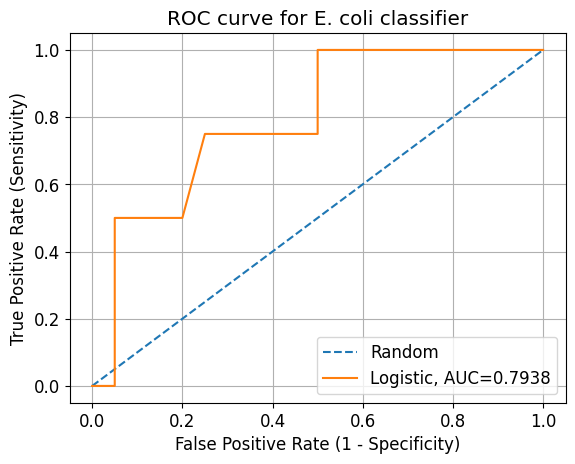

In [92]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# calculate AUC
auc = round(roc_auc_score(y_test, YProbAll['logreg']),4)

# generate a random prediction probability 
y_rand_probs = [0 for _ in range(len(y_test))]

# calculate scores
y_rand_auc = roc_auc_score(y_test, y_rand_probs)
y_test_auc = roc_auc_score(y_test, YProbAll['logreg'])

# # summarize scores
# print('Random: ROC AUC=', y_rand_auc)
# print('Logistic: ROC AUC=', y_test_auc)

# calculate roc curves
rand_fpr, rand_tpr, _ = roc_curve(y_test, y_rand_probs)
fpr, tpr, _ = roc_curve(y_test, YProbAll['logreg'])


# plot the roc curve for the model
plt.plot(rand_fpr, rand_tpr, linestyle='--', label='Random')
plt.plot(fpr, tpr, label="Logistic, AUC="+str(auc))

plt.rcParams['font.size'] = 12
plt.title('ROC curve for E. coli classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
# show the legend
plt.legend()

#### Rough to check

In [66]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#.......Predict the Test set result.......#
# y_pred = classifier.predict(x_test)
# y_pred_quant = classifier.predict_proba(x_test)[:, 1]
y_pred=classifier.predict(x_test).reshape(-1, 1)
y_probs=classifier.predict_proba(x_test)[:, 1].reshape(-1, 1)

c:\Users\neele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.0, 1.0)

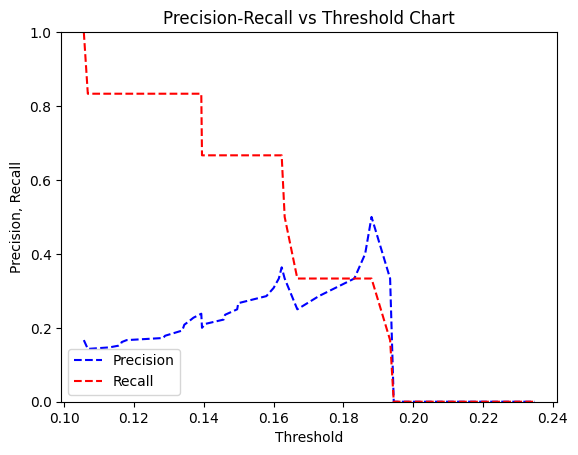

In [52]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_probs[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [67]:
y_pred_new_threshold = (classifier.predict_proba(x_test)[:, 1] >= 0.2).astype(int).reshape(-1, 1)

In [59]:
y_test.shape

(36, 1)

In [60]:
y_pred.shape

(36, 1)

In [68]:
y_pred_new_threshold.shape

(36, 1)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score
# Evaluation metrics for default threshold 
print("Evaluation metrics with threshold 0.5:") 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("AUC:", roc_auc_score(y_test,y_probs) )
print("Precision:", precision_score(y_test, y_pred)) 
print("Recall:", recall_score(y_test, y_pred)) 
print("F1 score:", f1_score(y_test, y_pred))

Evaluation metrics with threshold 0.5:
Accuracy: 0.8333333333333334
AUC: 0.6527777777777777
Precision: 0.0
Recall: 0.0
F1 score: 0.0


c:\Users\neele\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# Evaluation metrics for new threshold 
print("Evaluation metrics with threshold 0.9:") 
print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold)) 
print("Precision:", precision_score(y_test, y_pred_new_threshold)) 
print("Recall:", recall_score(y_test, y_pred_new_threshold)) 
print("F1 score:", f1_score(y_test, y_pred_new_threshold))

Evaluation metrics with threshold 0.9:
Accuracy: 0.8055555555555556
Precision: 0.0
Recall: 0.0
F1 score: 0.0


In [1]:
from classmodels import classifiers
from sklearn.metrics import confusion_matrix
my_instance2 = classifiers(x_train, x_test, y_train, y_test)
y_pred = my_instance2.logreg(x_train, x_test, y_train, y_test)
# cm = confusion_matrix(y_test,y_pred)
# cm

NameError: name 'x_train' is not defined

In [8]:
y_pred

(array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64),
 array([0.7965368 , 0.84662577, 0.67647059, 0.8625    , 0.64788732,
        2.61684328, 0.22672713]),
 array([[138,  22],
        [ 25,  46]], dtype=int64))

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#.......Predict the Test set result.......#
y_pred = classifier.predict(x_test)
y_pred_quant = classifier.predict_proba(x_test)[:, 1] #Only keep the first column, which is the 'pos' values

c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
 #..........Area Under the curve (AUC)...............#
from sklearn.metrics import auc, roc_auc_score
AUC = roc_auc_score(y_test,y_pred_quant)
#AUC = auc(fpr, tpr)
AUC


0.811619718309859

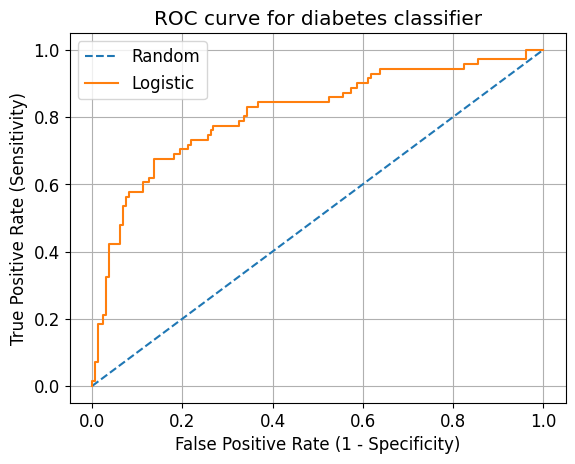

In [37]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

# calculate AUC
AUC = roc_auc_score(y_test, y_pred_quant)
# print('AUC: %.3f' % auc)

# generate a random prediction probability 
y_rand_probs = [0 for _ in range(len(y_test))]

# calculate scores
y_rand_auc = roc_auc_score(y_test, y_rand_probs)
y_test_auc = roc_auc_score(y_test, y_pred_quant)

# # summarize scores
# print('Random: ROC AUC=', y_rand_auc)
# print('Logistic: ROC AUC=', y_test_auc)

# calculate roc curves
rand_fpr, rand_tpr, _ = roc_curve(y_test, y_rand_probs)
fpr, tpr, _ = roc_curve(y_test, y_pred_quant)


# plot the roc curve for the model
plt.plot(rand_fpr, rand_tpr, linestyle='--', label='Random')
plt.plot(fpr, tpr, label='Logistic')

plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
# show the legend
plt.legend()

In [35]:
rand_tpr

array([0.        , 0.01408451, 0.01408451, 0.07042254, 0.07042254,
       0.18309859, 0.18309859, 0.21126761, 0.21126761, 0.32394366,
       0.32394366, 0.42253521, 0.42253521, 0.47887324, 0.47887324,
       0.53521127, 0.53521127, 0.56338028, 0.56338028, 0.57746479,
       0.57746479, 0.6056338 , 0.6056338 , 0.61971831, 0.61971831,
       0.67605634, 0.67605634, 0.69014085, 0.69014085, 0.70422535,
       0.70422535, 0.71830986, 0.71830986, 0.73239437, 0.73239437,
       0.74647887, 0.74647887, 0.76056338, 0.76056338, 0.77464789,
       0.77464789, 0.78873239, 0.78873239, 0.8028169 , 0.8028169 ,
       0.83098592, 0.83098592, 0.84507042, 0.84507042, 0.85915493,
       0.85915493, 0.87323944, 0.87323944, 0.88732394, 0.88732394,
       0.90140845, 0.90140845, 0.91549296, 0.91549296, 0.92957746,
       0.92957746, 0.94366197, 0.94366197, 0.95774648, 0.95774648,
       0.97183099, 0.97183099, 1.        , 1.        ])